# Abstract:

This analysis provides an in-depth evaluation of the performance of a UK-based e-commerce business over the course of a one-year period, from December 2010 to December 2011. The objective is to uncover key patterns, trends, and insights that can inform strategic decisions. To begin, I conducted Exploratory Data Analysis (EDA) to explore the dataset's structure and characteristics, identify any data quality issues, and highlight potential areas for further investigation. Following this, I performed a detailed analysis of the top 10 best-performing products, with a focus on the Jumbo Bag Red Retrosport, which emerged as the leading product in terms of sales. Additionally, I examined the revenue distribution to assess the overall financial performance and identified the top 10 customers by revenue to better understand customer behavior and loyalty. To conclude, I applied a t-test to determine if there was statistically significant growth in the average sales between the first and last six months of the dataset, providing insights into potential seasonal effects or overall business growth. This comprehensive analysis offers a valuable perspective on the business’s performance and highlights areas for potential improvement and growth.

# Introduction:

The growth and performance of e-commerce businesses are often driven by various factors such as product popularity, customer behavior, and seasonal trends. Understanding these dynamics is crucial for making data-informed decisions that can enhance profitability and customer satisfaction. This analysis seeks to answer the following research question: How has the performance of a UK-based e-commerce business evolved over the course of one year, specifically in terms of top-performing products, revenue distribution, and customer behavior?

The data available, spanning from December 2010 to December 2011, provides a comprehensive view of sales, customer transactions, and product performance during this period. By analyzing the dataset, this study aims to uncover patterns in sales performance, identify the most profitable products, and examine the influence of customer behavior on overall revenue generation. Additionally, the analysis will investigate whether there has been significant growth in average sales over the course of the year, providing insights into potential trends and areas for improvement. This research question is directly answerable using the available data, which includes detailed transactional and revenue information that can be leveraged to address these business performance aspects.

# Data Summary

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = '/data.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.Country.value_counts().head()

,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533


# EDA

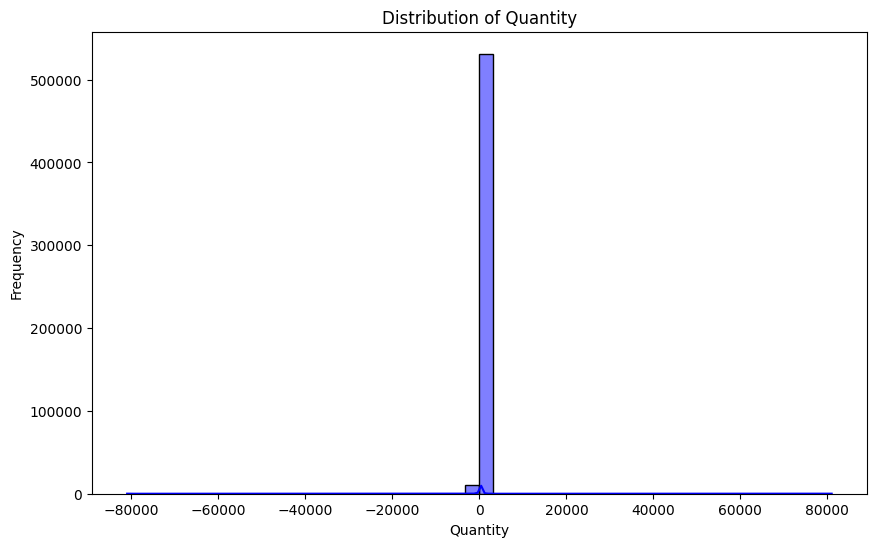

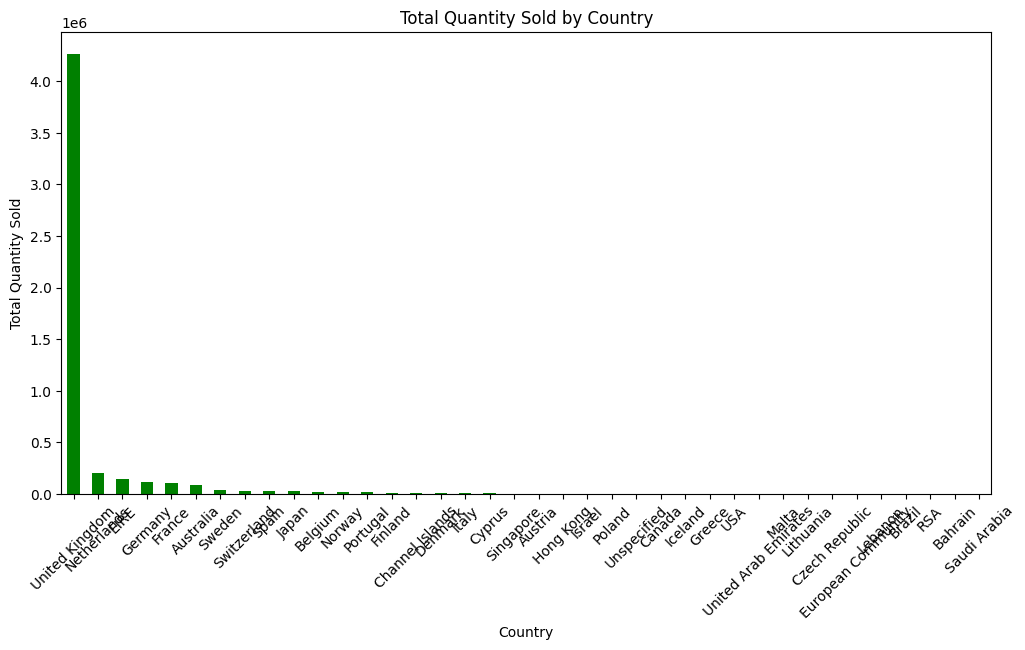

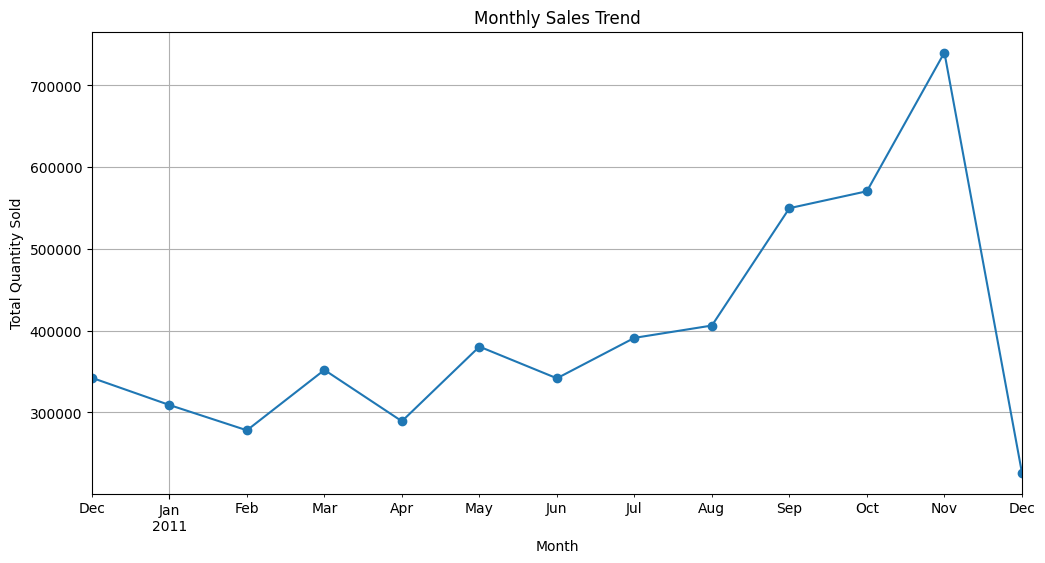

In [7]:
# ================================
# 1. Exploratory Data Analysis (EDA)
# ================================
# Visualize the distribution of quantities sold
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=50, kde=True, color='blue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Sales by country
country_sales = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar', color='green')
plt.title('Total Quantity Sold by Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Time-based sales trends
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Quantity'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

# Data Wrangling

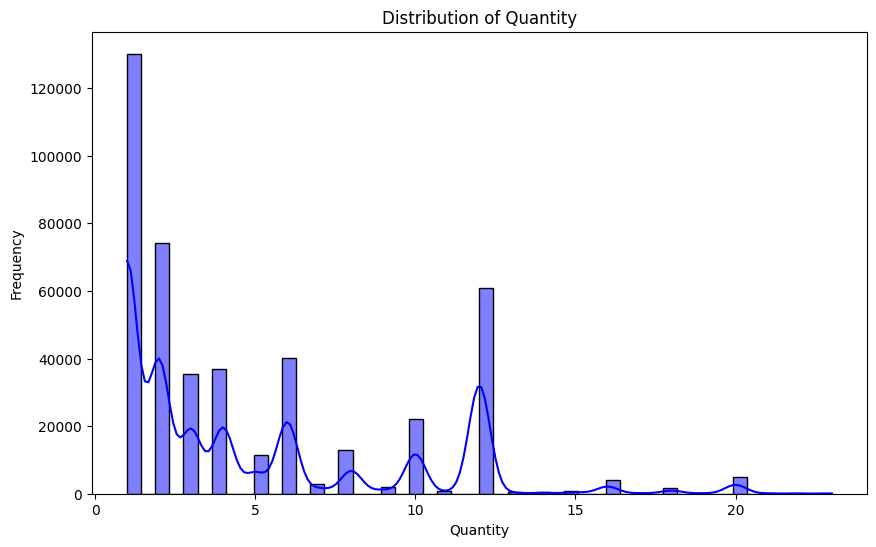


Handling Missing Values...

Columns after handling missing values: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Month']

Removing Duplicates...
Removed 4969 duplicate rows.
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL        

<ipython-input-8-5efae7d50d24>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [8]:
# ================================
# 2. Data Wrangling
# ================================
# Filter df for only positive quantities and remove outliers
df = df[df['Quantity']>0]
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

Q1a = df['UnitPrice'].quantile(0.25)
Q3a = df['UnitPrice'].quantile(0.75)
IQRa = Q3a - Q1a

# Define bounds for outliers
lower_bounda = Q1a - 1.5 * IQRa
upper_bounda = Q3a + 1.5 * IQRa

# Filter out outliers
df = df[(df['UnitPrice'] >= lower_bounda) & (df['UnitPrice'] <= upper_bounda)]

# Visualize the distribution of quantities sold with negatives removed
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=50, kde=True, color='blue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Handle missing values
print("\nHandling Missing Values...\n")
missing_threshold = 0.1 * len(df)  # Example: remove columns with >10% missing values
df = df.dropna(thresh=missing_threshold, axis=1)  # Drop columns
print(f"Columns after handling missing values: {df.columns.tolist()}")

# Drop rows with remaining missing values
df = df.dropna()

# Remove duplicates
print("\nRemoving Duplicates...")
before_duplicates = len(df)
df = df.drop_duplicates()
after_duplicates = len(df)
print(f"Removed {before_duplicates - after_duplicates} duplicate rows.")

# Add a total price column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
print(df)

# Data Analysis

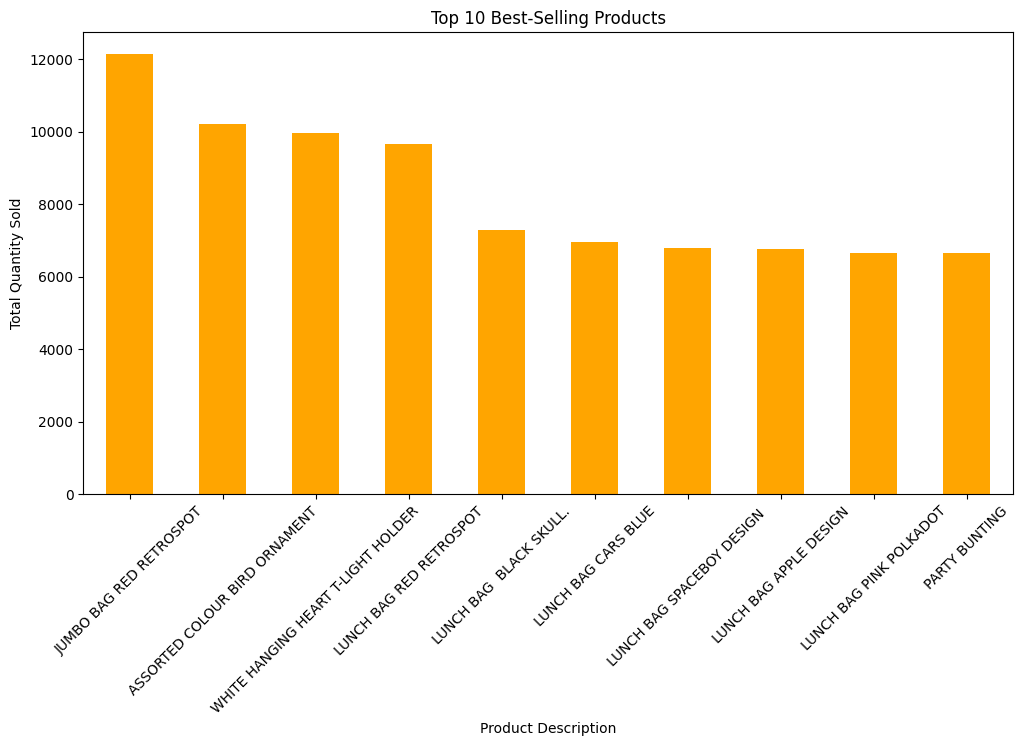

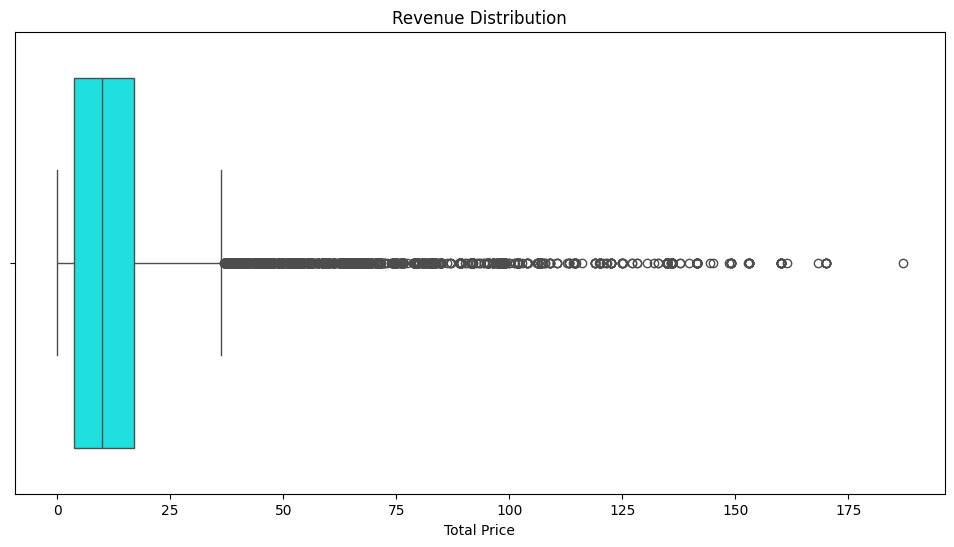

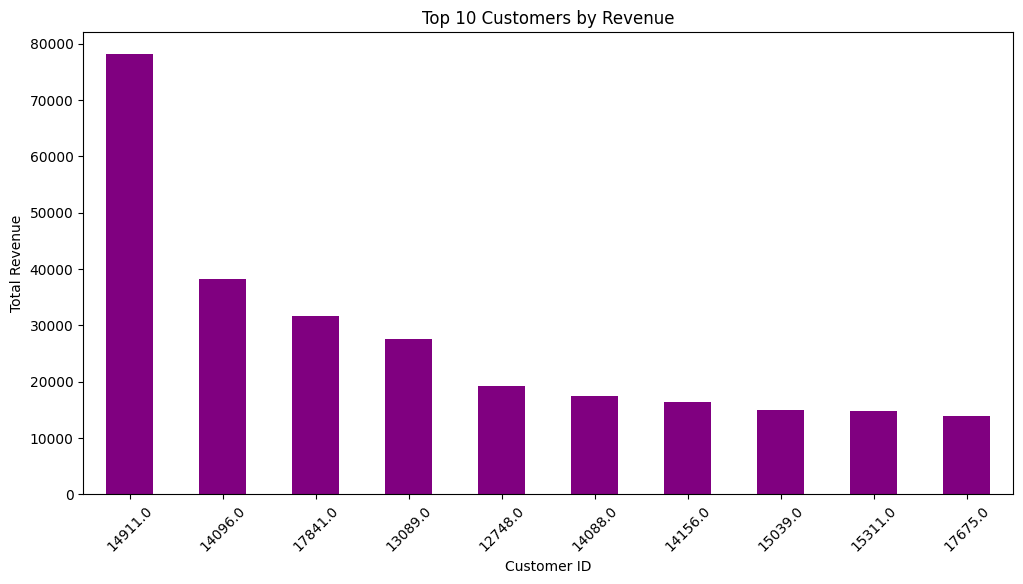

In [9]:
# ================================
# 3. Data Analysis
# ================================
# Class for analysis
class DataAnalysis:
    def __init__(self, dataframe):
        self.data = dataframe

    def plot_top_selling_products(self):
        top_products = self.data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
        plt.figure(figsize=(12, 6))
        top_products.plot(kind='bar', color='orange')
        plt.title('Top 10 Best-Selling Products')
        plt.xlabel('Product Description')
        plt.ylabel('Total Quantity Sold')
        plt.xticks(rotation=45)
        plt.show()

    def revenue_distribution(self):
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=self.data['TotalPrice'], color='cyan')
        plt.title('Revenue Distribution')
        plt.xlabel('Total Price')
        plt.show()

# Create an instance of the class
analysis = DataAnalysis(df)

# Top-selling products
analysis.plot_top_selling_products()

# Revenue distribution
analysis.revenue_distribution()

# Customer analysis - Top customers by revenue
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_customers.plot(kind='bar', color='purple')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

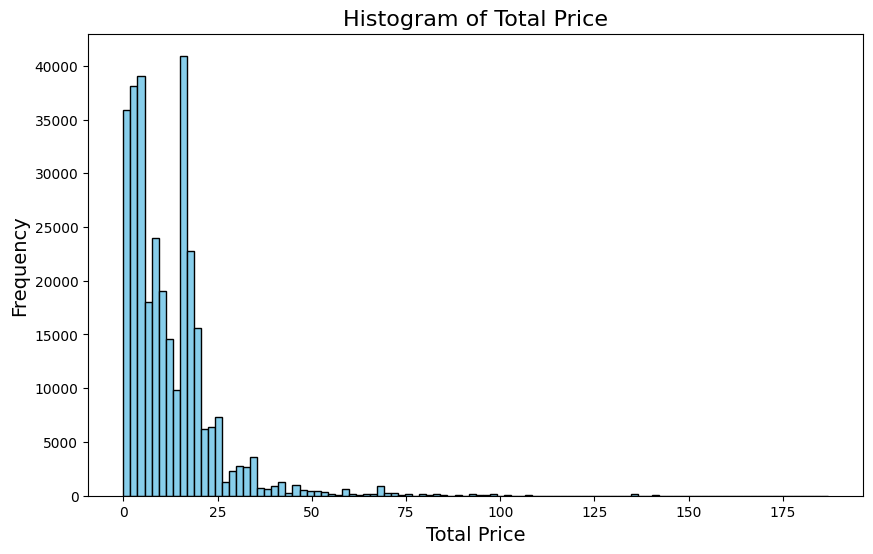

In [10]:
# Assuming df is already loaded
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(df['TotalPrice'], bins=100, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Total Price', fontsize=16)
plt.xlabel('Total Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


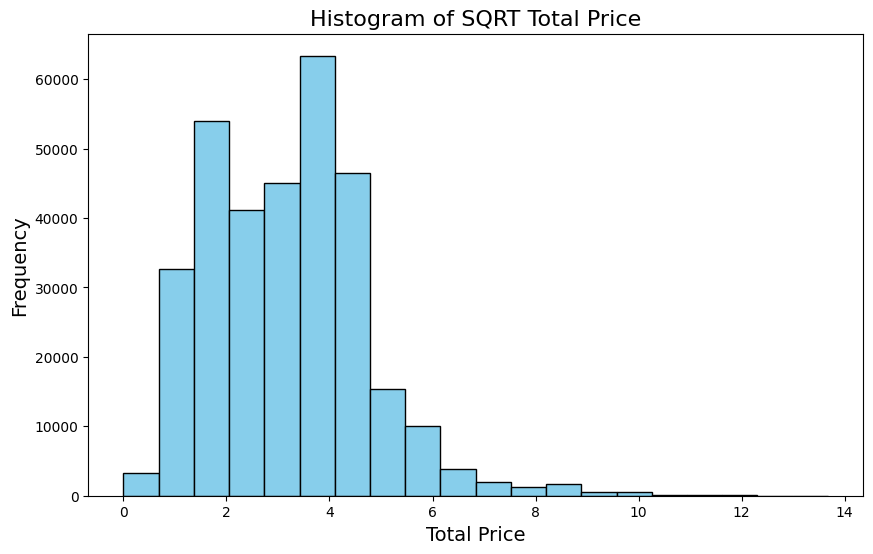

In [11]:
df['sqrt_TotalPrice'] = np.sqrt(df['TotalPrice'])

# Assuming df is already loaded
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(df['sqrt_TotalPrice'], bins=20, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Histogram of SQRT Total Price', fontsize=16)
plt.xlabel('Total Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

In [12]:
from scipy import stats

# Assuming df is your DataFrame

# Convert the 'InvoiceDate' to datetime if it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Define the date for comparison
date_cutoff = pd.Timestamp('2011-05-15')

# Split the data into two groups
before_cutoff = df[df['InvoiceDate'] < date_cutoff]['sqrt_TotalPrice']
after_cutoff = df[df['InvoiceDate'] >= date_cutoff]['sqrt_TotalPrice']

# Calculate the means of both groups
mean_before = before_cutoff.mean()
mean_after = after_cutoff.mean()

# Perform a t-test to compare the two groups
t_stat, p_value = stats.ttest_ind(before_cutoff, after_cutoff, equal_var=False)  # Welch's t-test

# Print the means and t-test result
print(f"Mean of sqrt_TotalPrice before {date_cutoff}: {mean_before}")
print(f"Mean of sqrt_TotalPrice after {date_cutoff}: {mean_after}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("The difference between the two groups is statistically significant (p < 0.05).")
else:
    print("The difference between the two groups is not statistically significant (p >= 0.05).")


Mean of sqrt_TotalPrice before 2011-05-15 00:00:00: 3.2228056577451047
Mean of sqrt_TotalPrice after 2011-05-15 00:00:00: 3.1484090601646666
T-statistic: 13.179192960863475
P-value: 1.1989064064817809e-39
The difference between the two groups is statistically significant (p < 0.05).


# Conclusion:

This analysis reveals several key insights into the performance of the UK-based e-commerce business over the course of one year, though it also highlights the need for further data cleaning and refinement before drawing definitive conclusions. The dataset revealed some critical issues, such as the lack of clarity regarding the currency and time zone, which could impact the accuracy of any deeper statistical analysis. Additionally, it was noted that there are 4,969 duplicate rows, which further emphasizes the importance of thorough data cleaning for more reliable results.

From the analysis, we observed that the United Kingdom accounted for the highest sales volume, indicating that the domestic market may be the primary driver of revenue for this business. Over time, monthly sales showed a consistent upward trend, suggesting that the business is experiencing growth. However, a skew was evident in the quantity ordered, pointing to potential outliers or bulk purchasing, which could be important for inventory and supply chain management.

The top three selling products—Jumbo Bag Red Retrosport, Assorted Colour Bird Ornament, and White Hanging Tea-Light Holder—stand out as key drivers of revenue. The revenue distribution was found to be centered around approximately 10, with a slight right skew, indicating a concentration of lower-value transactions with a few larger outliers. One particular customer contributed a significant portion of the revenue, providing £80,000 in total sales. However, without additional information about this customer or their purchasing patterns, it is difficult to draw meaningful conclusions about the business's customer base.

Regarding statistical analysis, a large skew in the total price data was observed, which was mitigated to some extent by applying a square root transformation. Following this, a two-sample t-test was conducted to determine whether there was a statistically significant difference in total sales between the first and second halves of the dataset. The results provided enough evidence to reject the null hypothesis, suggesting that there was a change in sales performance throughout the course of the year, potentially indicating business growth or seasonal variations.

These findings have significant implications for the business. The observed growth in monthly sales suggests positive trends that could be leveraged for future marketing and inventory strategies. The dominance of certain products in driving revenue highlights the importance of focusing on best-sellers while considering strategies to address potential customer concentration risks. The identification of a high-value customer also suggests that understanding and nurturing relationships with key clients could be critical to future growth. Overall, while the dataset has its limitations, the insights gained offer a valuable starting point for businesses looking to refine their strategies and capitalize on emerging trends. Further data cleaning, deeper customer analysis, and more comprehensive statistical testing could enhance these findings and provide a more nuanced understanding of the business's performance.